In [194]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(10,10)

tcms = pd.read_csv('tcms_total.csv')

In [195]:
tcms["ganador"] = np.where(tcms.artista.isin(["Angy", "Roko", "Edurne", "Ruth Lorenzo", "Blas Cantó", "Miquel Fernández", "María Villalón"]), 1, 0)

In [196]:
tcms.loc[(tcms.artista == 'Santiago Segura') & (tcms.temporada == 1), 'artista'] = 'Santiago Segura I'

In [197]:
tcms.loc[(tcms.artista == 'Santiago Segura') & (tcms.temporada == 2), 'artista'] = 'Santiago Segura II'

In [198]:
tcms.head()

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria,ganador
0,1,1,"Born This Way, de Lady Gaga",Angy,12,12,10,12,0,Toñi,...,Born This Way,Lady Gaga,NaN,España,Canarias,Palma,F,21,Cantante,1
1,1,2,"Me gustas mucho, de Rocío Dúrcal",Angy,10,9,6,7,0,Sylvia,...,Me gustas mucho,Rocío Dúrcal,NaN,España,Canarias,Palma,F,21,Cantante,1
2,1,3,Only Girl (In the World) de Rihanna,Angy,9,9,5,7,0,Julio,...,Only Girl (In the World),Rihanna,NaN,España,Canarias,Palma,F,21,Cantante,1
3,1,4,Girls Just Want to Have Fun de Cyndi Lauper,Angy,12,9,10,10,0,Carolina,...,Girls Just Want to Have Fun,Cyndi Lauper,NaN,España,Canarias,Palma,F,21,Cantante,1
4,1,5,Thriller de Michael Jackson,Angy,7,6,5,7,0,Toñi,...,Thriller,Michael Jackson,NaN,España,Canarias,Palma,F,21,Cantante,1


In [199]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso

In [200]:
df1 = tcms[['sexo', 'categoria', 'artista','ganador','temporada', 'programa', 'cancion', 'j1','j2','j3','j4','publico']].melt(id_vars=['sexo', 'categoria', 'artista','ganador','cancion', 'temporada', 'programa'], value_vars=['j1','j2','j3','j4','publico'], var_name='jurado', value_name='puntuacion')

In [201]:
df1.head()

,sexo,categoria,artista,ganador,cancion,temporada,programa,jurado,puntuacion
0,F,Cantante,Angy,1,"Born This Way, de Lady Gaga",1,1,j1,12
1,F,Cantante,Angy,1,"Me gustas mucho, de Rocío Dúrcal",1,2,j1,10
2,F,Cantante,Angy,1,Only Girl (In the World) de Rihanna,1,3,j1,9
3,F,Cantante,Angy,1,Girls Just Want to Have Fun de Cyndi Lauper,1,4,j1,12
4,F,Cantante,Angy,1,Thriller de Michael Jackson,1,5,j1,7


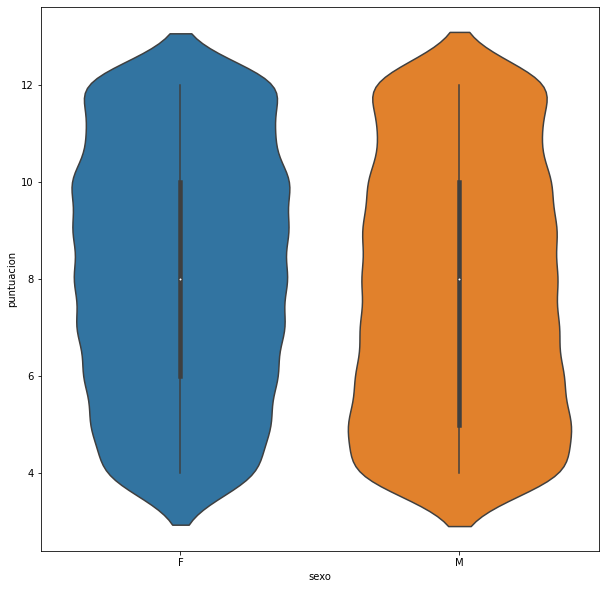

In [22]:
sns.violinplot(data=df1[df1.puntuacion>0], x='sexo', y='puntuacion')

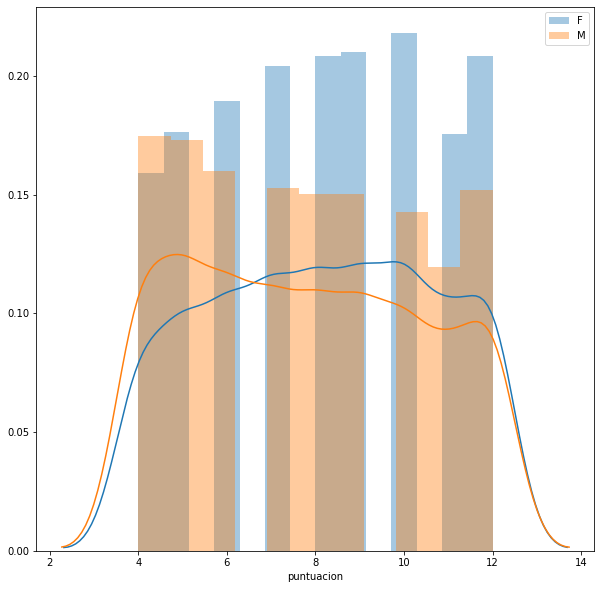

In [23]:
sns.distplot(df1[(df1.sexo=='F') & (df1.puntuacion>0)].puntuacion, label='F')
sns.distplot(df1[(df1.sexo=='M') & (df1.puntuacion>0)].puntuacion, label='M')
plt.legend()

In [24]:
df1.groupby('sexo').puntuacion.mean()

sexo
F    7.623782
M    7.189279
Name: puntuacion, dtype: float64

In [25]:
df1.groupby('sexo').puntuacion.mean()

sexo
F    7.623782
M    7.189279
Name: puntuacion, dtype: float64

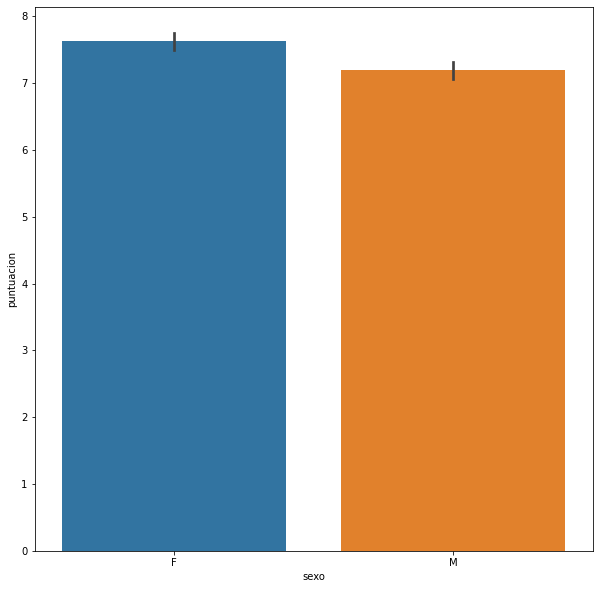

In [26]:
sns.barplot(x='sexo', y='puntuacion', data=df1)

In [27]:
# df1 = tcms[tcms.programa < 4][['temporada', 'artista','ganador','programa', 'cancion', 'j1','j2','j3','j4','publico']].melt(id_vars=['temporada', 'artista','ganador','cancion', 'programa'], value_vars=['j1','j2','j3','j4','publico'], var_name='jurado', value_name='puntuacion')

In [124]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, kruskal, friedmanchisquare, f_oneway, chi2_contingency

### Puntuación individual

In [40]:
chicos = df1[(df1.sexo=='M') & (df1.puntuacion>0)].puntuacion
chicas = df1[(df1.sexo=='F') & (df1.puntuacion>0)].puntuacion

In [41]:
ttest_ind(chicos, chicas)

Ttest_indResult(statistic=-4.873655176739703, pvalue=1.1301387185043237e-06)

In [42]:
mannwhitneyu(chicos, chicas)

MannwhitneyuResult(statistic=2754656.0, pvalue=4.897839697231478e-07)

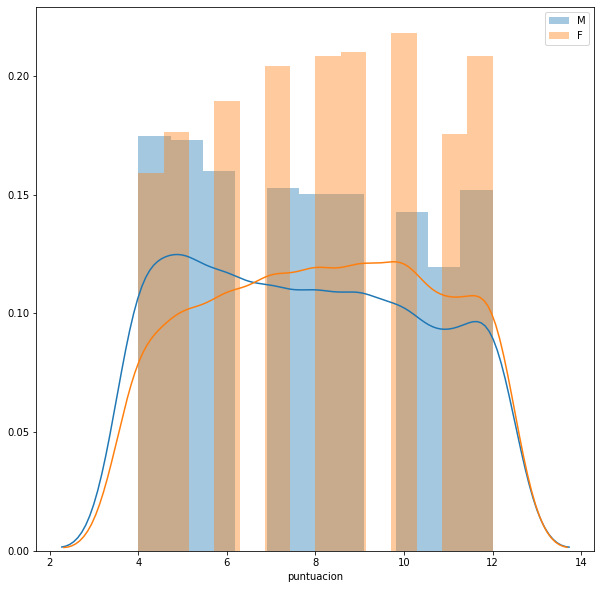

In [44]:
sns.distplot(chicos,label='M')
sns.distplot(chicas,label='F')
plt.legend()

### Puntuación por gala

In [58]:
chicos_gala = df1[(df1.sexo=='M') & (df1.puntuacion>0)].groupby(['artista','programa']).sum().puntuacion
chicas_gala = df1[(df1.sexo=='F') & (df1.puntuacion>0)].groupby(['artista','programa']).sum().puntuacion

In [59]:
ttest_ind(chicos_gala, chicas_gala)

Ttest_indResult(statistic=0.09990200354052232, pvalue=0.9204417568850879)

In [60]:
mannwhitneyu(chicos_gala, chicas_gala)

MannwhitneyuResult(statistic=122234.5, pvalue=0.03880115849216076)

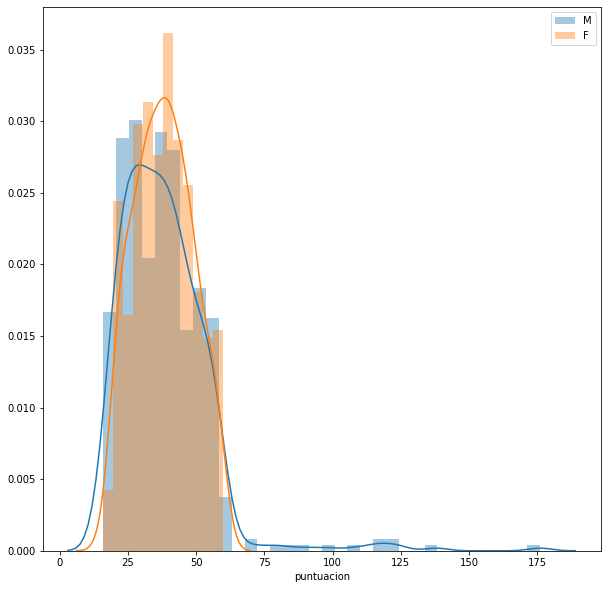

In [67]:
sns.distplot(chicos_gala,label='M')
sns.distplot(chicas_gala,label='F')
plt.legend()

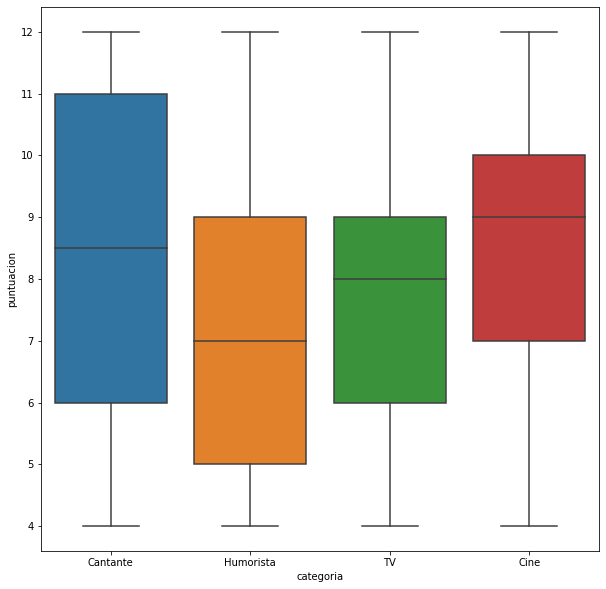

In [74]:
sns.boxplot(data=df1[df1.puntuacion>0], x='categoria', y='puntuacion')

In [76]:
cantantes = df1[(df1.categoria=='Cantante') & (df1.puntuacion>0)].puntuacion
humoristas = df1[(df1.categoria=='Humorista') & (df1.puntuacion>0)].puntuacion
tv = df1[(df1.categoria=='TV') & (df1.puntuacion>0)].puntuacion
cine = df1[(df1.categoria=='Cine') & (df1.puntuacion>0)].puntuacion

In [77]:
f_oneway(cantantes, humoristas, tv, cine)

F_onewayResult(statistic=75.23895852569053, pvalue=1.426379012168949e-47)

In [81]:
ttest_1samp(tcms['j1'] - tcms['j2'], 0)

Ttest_1sampResult(statistic=1.066521363078495, pvalue=0.2864324912537569)

In [91]:
ttest_1samp(tcms['j3'] - tcms['j4'], 0)

Ttest_1sampResult(statistic=0.04500626573148037, pvalue=0.9641108478857021)

In [95]:
ttest_1samp(tcms[tcms.publico>0]['j1'] - tcms[tcms.publico>0]['publico'], 0)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

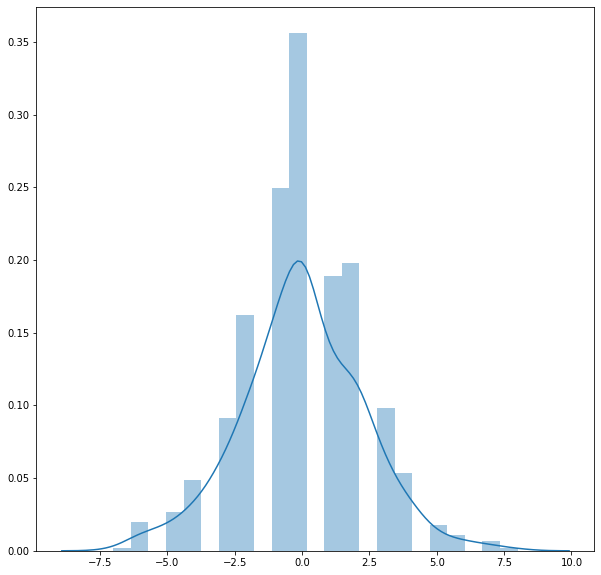

In [89]:
sns.distplot(tcms[tcms.publico>0]['j1'] - tcms[tcms.publico>0]['publico'])

In [96]:
jurados = ['j1', 'j2', 'j3', 'j4', 'publico']

In [100]:
jurados.copy().remove('j2')

In [98]:
jurados

['j2', 'j3', 'j4', 'publico']

In [109]:
tcms.loc[tcms.publico == 0,'publico'] = None

In [106]:
help(tcms[jurados].mean)

Help on method mean in module pandas.core.frame:

mean(axis=None, skipna=None, level=None, numeric_only=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return the mean of the values for the requested axis.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
        Axis for the function to be applied on.
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    **kwargs
        Additional keyword arguments to be passed to the function.
    
    Returns
    -------
    Series or DataFrame (if level specified)



In [113]:
tcms[jurados].head()

,j1,j2,j3,j4,publico
0,12,12,10,12,NaN
1,10,9,6,7,NaN
2,9,9,5,7,NaN
3,12,9,10,10,NaN
4,7,6,5,7,NaN


In [112]:
tcms[jurados].mean(axis=1, skipna=True)

0       11.50
1        8.00
2        7.50
3       10.25
4        6.25
5        6.50
6        9.00
7        7.75
8       10.75
9       10.50
10       4.25
11       9.75
12       6.00
13      11.00
14       4.50
15       5.50
16       7.75
17       6.75
18       8.25
19       7.25
20       5.00
21       7.75
22       8.50
23      10.75
24       7.50
25       7.50
26       9.25
27       7.75
28       7.25
29       7.00
30       5.75
31       8.75
32       4.50
33      10.75
34       4.00
35       4.50
36       5.00
37      10.75
38       5.50
39       8.75
40       9.00
41       8.50
42       9.00
43       9.25
44       6.50
45       7.00
46       4.75
47       8.25
48       9.25
49       6.00
50       7.50
51       5.00
52       8.75
53       7.25
54       5.00
55      11.00
56       6.00
57       9.25
58       7.00
59      10.00
60       4.75
61       6.00
62       6.00
63       6.00
64       6.00
65       7.75
66       7.75
67      12.00
68      12.00
69       4.00
70       4.00
71    

In [120]:
pd.set_option('display.max_rows', 5)

In [163]:
jurados = ['j1', 'j2', 'j3', 'j4', 'publico']

for j in jurados:
        
    otros = jurados.copy()
    otros.remove(j)
        
    voto_jurado = tcms[jurados + ['artista']].copy()
    if j == 'publico':
        voto_jurado.dropna(axis=0, inplace=True)
        
    for artista in voto_jurado.artista.unique(): 
        
        try:
            (u, p_val) = wilcoxon(voto_jurado[voto_jurado.artista == artista][j], voto_jurado[voto_jurado.artista== artista][otros].mean(axis=1, skipna=True))
            # (u, p_val) = ttest_ind(voto_jurado[voto_jurado.artista == artista][j] - voto_jurado[voto_jurado.artista== artista][otros].mean(axis=1, skipna=True), 0)
            if p_val < 0.05:
                print(f'Diferencia significativa de {j} con {artista} (p_value: {p_val})')
        except Exception as e:
            print(e)
            print(j, artista)
            display(voto_jurado[voto_jurado.artista == artista][otros])
            display(voto_jurado)
            

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Diferencia significativa de j1 con Sylvia Pantoja (p_value: 0.034808478811867126)
Diferencia significativa de j1 con Roko (p_value: 0.029973973586555843)
Diferencia significativa de j1 con Ángeles Muñoz (p_value: 0.03719247007367736)
Diferencia significativa de j1 con Melody (p_value: 0.0067971045969308225)
Diferencia significativa de j1 con Ángela Carrasco (p_value: 0.038346475151991855)
Diferencia significativa de j1 con Silvia Abril (p_value: 0.03501272509827664)
Diferencia significativa de j1 con Rosa López (p_value: 0.017191408320317826)
Diferencia significativa de j1 con Juan Muñoz (p_value: 0.005727568533684952)
Diferencia significativa de j1 con David Guapo (p_value: 0.0189326372802442)
Diferencia significativa de j1 con Jordi Coll (p_value: 0.04052827776002543)
Diferencia significativa de j1 con José Corbacho (p_value: 0.04506863801632776)
Diferencia significativa de j2 con Arturo Valls (p_value: 0.012571719482233408)
Diferencia significativa de j2 con María del Monte (p_value

In [164]:
concursantes = pd.read_csv('concursantes.csv')

In [165]:
concursantes

,artista,pais,region,ciudad,sexo,edad,categoria
0,Angy,España,Canarias,Palma,F,21,Cantante
1,Santiago Segura,España,Madrid,Madrid,M,46,Cine
...,...,...,...,...,...,...,...
68,Nerea Rodríguez,España,Cataluña,Gavá,F,21,Cantante
69,Rocío Madrid,España,Andalucía,Málaga,F,41,TV


In [169]:
tcms.total

0           56
1           45
         ...  
1052    18 (4)
1053    22 (5)
Name: total, Length: 1054, dtype: object

In [189]:
pd.set_option('display.max_rows', 25)

In [203]:
df1.groupby(['artista','temporada']).sum().puntuacion.reset_index().sort_values('puntuacion', ascending=False).head(25)

,artista,temporada,puntuacion
25,Fran Dieli,6,897
49,Miquel Fernández,6,882
17,Diana Navarro,6,840
8,Blas Cantó,5,833
6,Beatriz Luengo,5,801
38,Lorena Gómez,5,790
40,Lucía Gil,6,773
53,Raúl Pérez,6,770
52,Pepa Aniorte,6,753
41,Lucía Jiménez,6,753
